In [69]:
%pip install langchain langchain-mistralai python-dotenv pandas tqdm langchain-ollama matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [70]:
import os
import pandas as pd
from dotenv import load_dotenv
from langchain_mistralai import ChatMistralAI
from langchain_ollama import ChatOllama

# 1. Chargement du fichier .env
loaded = load_dotenv() 

# Vérification rapide
if not loaded:
    print("Attention : Le fichier .env n'a pas été trouvé.")
elif not os.getenv("MISTRAL_API_KEY"):
    print("Attention : La variable MISTRAL_API_KEY est vide ou manquante.")
else:
    print("Environnement chargé.")

# 2. Initialisation du modèle Ministral 3B
llm = ChatOllama(
    model="ministral-3:3b",
    temperature=0.2,
    api_key=os.getenv("MISTRAL_API_KEY")
)

print(f"Modèle configuré : {llm.model}")

Environnement chargé.
Modèle configuré : ministral-3:3b


In [71]:
try:
    response = llm.invoke("Ne renvoie QUE la réponse de la question donc une requete solr. Convertis cette phrase en une requête simple solr : 'Cherche les pommes rouges'")
    print("Test de connexion réussi ! Réponse du modèle :")
    print(response.content)
except Exception as e:
    print(f"Erreur de connexion : {e}")

Test de connexion réussi ! Réponse du modèle :
`(fruit:"pomme" AND color:"rouge")`


In [72]:
name_prompt = "PROMPT_BAD"
SYSTEM_PROMPT_TEXT = """Tu es un expert en administration de moteurs de recherche Solr.
Ta tâche est de traduire des demandes en langage naturel en requêtes Solr syntaxiquement parfaites.
Ne fournis AUCUNE explication, pas de markdown, pas de phrase d'introduction.
Renvoie **uniquement** la chaîne de requête brute."""

name_prompt = "PROMPT_SCHEMA"
SYSTEM_PROMPT_TEXT = """Tu es un expert en administration de moteurs de recherche Solr.
Ta tâche est de traduire des demandes en langage naturel en requêtes Solr syntaxiquement parfaites.

### 1. SCHÉMA DE DONNÉES DISPONIBLE
Tu ne dois utiliser QUE les champs suivants. N'invente aucun autre champ.
- doc_type (string) : Type de document (ex: facture, devis, incident, contrat, rapport, commande).
- fournisseur (string) : Nom de l'entité tierce (ex: Haribo, Lutti, Interne).
- montant (float) : Valeur numérique.
- date_creation (date) : Date du document.
- date_modif (date) : Date de modification.
- statut (string) : État du document (ex: Validé, Clôturé, Impayée, Critique).
- assigne_a (string) : Personne responsable (ex: Martin).
- projet (string) : Nom du projet.
- ligne (string) : Identifiant de ligne de production.
- priorite (string) : Niveau d'urgence.
- texte_complet (text) : Pour la recherche floue de mots-clés.

### 2. INSTRUCTION FINALE
Ne fournis AUCUNE explication, pas de markdown, pas de phrase d'introduction.
Renvoie **uniquement** la chaîne de requête brute."""

name_prompt = "PROMPT_SCHEMA-SYNTAXE"
SYSTEM_PROMPT_TEXT = """Tu es un expert en administration de moteurs de recherche Solr.
Ta tâche est de traduire des demandes en langage naturel en requêtes Solr syntaxiquement parfaites.

### 1. SCHÉMA DE DONNÉES DISPONIBLE
Tu ne dois utiliser QUE les champs suivants. N'invente aucun autre champ.
- doc_type (string) : Type de document (ex: facture, devis, incident, contrat, rapport, commande).
- fournisseur (string) : Nom de l'entité tierce (ex: Haribo, Lutti, Interne).
- montant (float) : Valeur numérique.
- date_creation (date) : Date du document.
- date_modif (date) : Date de modification.
- statut (string) : État du document (ex: Validé, Clôturé, Impayée, Critique).
- assigne_a (string) : Personne responsable (ex: Martin).
- projet (string) : Nom du projet.
- ligne (string) : Identifiant de ligne de production.
- priorite (string) : Niveau d'urgence.
- texte_complet (text) : Pour la recherche floue de mots-clés.

### 2. RÈGLES DE SYNTAXE CRITIQUES
- **Booléens** : Utilise TOUJOURS les opérateurs en majuscules : AND, OR.
- **Plages** : Utilise les crochets `[MIN TO MAX]`. Pour l'infini, utilise `*` (ex: `[500 TO *]`).
- **Dates** : Utilise les mathématiques de date Solr.
    - "Mois dernier" -> `[NOW-1MONTH/MONTH TO NOW/MONTH]`
    - "Il y a moins de 7 jours" -> `[NOW-7DAYS TO NOW]`
    - "Avant le 1er Jan 2024" -> `[* TO 2024-01-01T00:00:00Z]`
- **Tri** : Si une demande implique un ordre, ajoute `&sort=champ direction` à la fin (ex: `&sort=date_creation desc`).
- **Négation** : Pour "sauf" ou "pas", utilise le signe `-` (ex: `-statut:Clôturé`).
- **Exactitude** : Ne mets pas d'espaces autour des deux points (ex: `champ:valeur`, PAS `champ : valeur`).
- **Pas de crochets pour le texte** : N'utilise JAMAIS les crochets [] pour une recherche de mot simple ou exact. Utilise champ:valeur (sans crochets) ou champ:"phrase exacte" (avec guillemets). Exemple : texte_complet:maintenance (PAS texte_complet:[maintenance]).

### 3. INSTRUCTION FINALE
Ne fournis AUCUNE explication, pas de markdown, pas de phrase d'introduction.
Renvoie **uniquement** la chaîne de requête brute."""

name_prompt = "PROMPT_SCHEMA-SYNTAXE-FEW-SHOT"
SYSTEM_PROMPT_TEXT = """Tu es un expert en administration de moteurs de recherche Solr.
Ta tâche est de traduire des demandes en langage naturel en requêtes Solr syntaxiquement parfaites.

### 1. SCHÉMA DE DONNÉES DISPONIBLE
Tu ne dois utiliser QUE les champs suivants. N'invente aucun autre champ.
- doc_type (string) : Type de document (ex: facture, devis, incident, contrat, rapport, commande).
- fournisseur (string) : Nom de l'entité tierce (ex: Haribo, Lutti, Interne).
- montant (float) : Valeur numérique.
- date_creation (date) : Date du document.
- date_modif (date) : Date de modification.
- statut (string) : État du document (ex: Validé, Clôturé, Impayée, Critique).
- assigne_a (string) : Personne responsable (ex: Martin).
- projet (string) : Nom du projet.
- ligne (string) : Identifiant de ligne de production.
- priorite (string) : Niveau d'urgence.
- texte_complet (text) : Pour la recherche floue de mots-clés.

### 2. RÈGLES DE SYNTAXE CRITIQUES
- **Booléens** : Utilise TOUJOURS les opérateurs en majuscules : AND, OR.
- **Plages** : Utilise les crochets `[MIN TO MAX]`. Pour l'infini, utilise `*` (ex: `[500 TO *]`).
- **Dates** : Utilise les mathématiques de date Solr.
    - "Mois dernier" -> `[NOW-1MONTH/MONTH TO NOW/MONTH]`
    - "Il y a moins de 7 jours" -> `[NOW-7DAYS TO NOW]`
    - "Avant le 1er Jan 2024" -> `[* TO 2024-01-01T00:00:00Z]`
- **Tri** : Si une demande implique un ordre, ajoute `&sort=champ direction` à la fin (ex: `&sort=date_creation desc`).
- **Négation** : Pour "sauf" ou "pas", utilise le signe `-` (ex: `-statut:Clôturé`).
- **Exactitude** : Ne mets pas d'espaces autour des deux points (ex: `champ:valeur`, PAS `champ : valeur`).
- **Pas de crochets pour le texte** : N'utilise JAMAIS les crochets [] pour une recherche de mot simple ou exact. Utilise champ:valeur (sans crochets) ou champ:"phrase exacte" (avec guillemets). Exemple : texte_complet:maintenance (PAS texte_complet:[maintenance]).

### 3. EXEMPLES (FEW-SHOT)
Input: Factures de plus de 1000€
Output: doc_type:facture AND montant:[1000 TO *]

Input: Documents récents sur la maintenance
Output: texte_complet:maintenance AND date_creation:[NOW-30DAYS TO NOW]

Input: Incidents urgents non assignés
Output: doc_type:incident AND texte_complet:urgent AND -assigne_a:[* TO *]

### 4. INSTRUCTION FINALE
Ne fournis AUCUNE explication, pas de markdown, pas de phrase d'introduction.
Renvoie **uniquement** la chaîne de requête brute."""

In [73]:
import json
import datetime
import pandas as pd
from tqdm import tqdm
from langchain_core.prompts import ChatPromptTemplate

# 1. Configuration
NUM_ITERATIONS = 1

# Chargement du dataset
with open("benchmark_dataset.json", "r", encoding="utf-8") as f:
    dataset = json.load(f)

# Création de la chaîne (Chain)
prompt = ChatPromptTemplate.from_messages([
    ("system", SYSTEM_PROMPT_TEXT),
    ("user", "{question}")
])
chain = prompt | llm

# Stockage des résultats
benchmark_results = []

print(f"Démarrage du Benchmark : {NUM_ITERATIONS} itérations sur {len(dataset)} questions.")
print(f"System Prompt : '{SYSTEM_PROMPT_TEXT}'")
print(f"Total d'appels prévus : {NUM_ITERATIONS * len(dataset)}")

# 2. Boucle d'exécution
# On utilise tqdm pour voir la barre de progression globale
with tqdm(total=NUM_ITERATIONS * len(dataset)) as pbar:
    for i in range(1, NUM_ITERATIONS + 1):
        for entry in dataset:
            question = entry["question"]
            expected = entry["expected_solr"]
            
            # Appel LLM
            try:
                response = chain.invoke({"question": question})
                raw_content = response.content.strip()
                # Nettoyage robuste : on enlève les balises Markdown et les backticks
                generated = raw_content.replace("```solr", "").replace("```", "").strip("`").strip()
            except Exception as e:
                generated = "ERROR"
            
            # Comparaison stricte (Exact Match)
            # Note : C'est une comparaison naïve (A == B). 
            # Si le LLM ajoute un espace ou inverse deux filtres, ce sera False.
            is_exact_match = (generated == expected)
            
            # Enregistrement du résultat
            benchmark_results.append({
                "iteration": i,
                "question_id": entry["id"],
                "difficulty": entry["difficulty"],
                "question": question,
                "expected": expected,
                "generated": generated,
                "is_exact_match": is_exact_match,
            })
            
            pbar.update(1)

# 3. Sauvegarde des résultats
date_str = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"results_system_{name_prompt}_{date_str}.json"

with open(filename, "w", encoding="utf-8") as f:
    json.dump(benchmark_results, f, indent=4, ensure_ascii=False)

# 4. Petit résumé rapide dans la console
df_res = pd.DataFrame(benchmark_results)
accuracy = df_res["is_exact_match"].mean() * 100

print(f"\nBenchmark terminé !")
print(f"Résultats sauvegardés dans : {filename}")
print(f"Précision moyenne (Exact Match) : {accuracy:.2f}%")

Démarrage du Benchmark : 1 itérations sur 25 questions.
System Prompt : 'Tu es un expert en administration de moteurs de recherche Solr.
Ta tâche est de traduire des demandes en langage naturel en requêtes Solr syntaxiquement parfaites.

### 1. SCHÉMA DE DONNÉES DISPONIBLE
Tu ne dois utiliser QUE les champs suivants. N'invente aucun autre champ.
- doc_type (string) : Type de document (ex: facture, devis, incident, contrat, rapport, commande).
- fournisseur (string) : Nom de l'entité tierce (ex: Haribo, Lutti, Interne).
- montant (float) : Valeur numérique.
- date_creation (date) : Date du document.
- date_modif (date) : Date de modification.
- statut (string) : État du document (ex: Validé, Clôturé, Impayée, Critique).
- assigne_a (string) : Personne responsable (ex: Martin).
- projet (string) : Nom du projet.
- ligne (string) : Identifiant de ligne de production.
- priorite (string) : Niveau d'urgence.
- texte_complet (text) : Pour la recherche floue de mots-clés.

### 2. RÈGLES DE SY

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [01:22<00:00,  3.29s/it]


Benchmark terminé !
Résultats sauvegardés dans : results_system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT_2026-02-10_15-58-17.json
Précision moyenne (Exact Match) : 44.00%


In [74]:
import json
import requests
import glob
import os
import pandas as pd
from tqdm import tqdm

# --- CONFIGURATION ---
SOLR_URL = "http://localhost:8983/solr/benchmark_core/select"

# --- 1. FONCTIONS UTILITAIRES ---

def parse_and_query_solr(query_str):
    """
    Découpe la chaîne (ex: 'q=...&sort=...') pour l'envoyer proprement à l'API Solr.
    Retourne la liste des IDs trouvés ou None si erreur.
    """
    if not query_str or query_str.startswith("ERROR"):
        return None

    # Paramètres par défaut : on veut juste les IDs, et beaucoup de rows pour être sûr de tout avoir
    params = {
        'fl': 'id',
        'rows': 1000,
        'wt': 'json'
    }

    # Gestion basique des paramètres URL-like générés par le LLM (ex: &sort=date desc)
    # Le LLM renvoie souvent "champ:valeur&sort=..."
    try:
        if '&' in query_str:
            parts = query_str.split('&')
            params['q'] = parts[0] # La première partie est toujours la query principale
            for part in parts[1:]:
                if '=' in part:
                    key, value = part.split('=', 1)
                    params[key] = value
        else:
            params['q'] = query_str

        # Exécution
        response = requests.get(SOLR_URL, params=params, timeout=2)
        
        if response.status_code == 200:
            data = response.json()
            # On retourne la liste des IDs (l'ordre compte pour le tri)
            return [doc['id'] for doc in data.get('response', {}).get('docs', [])]
        else:
            return None # Erreur syntaxe Solr (400)
            
    except Exception as e:
        return None # Erreur connexion

def compare_results(ids_expected, ids_generated, check_order=False):
    """
    Compare deux listes d'IDs.
    - check_order=True : Compare les listes (pour le tri)
    - check_order=False : Compare les sets (pour le filtrage simple)
    """
    if ids_expected is None or ids_generated is None:
        return False
    
    if check_order:
        return ids_expected == ids_generated
    else:
        return set(ids_expected) == set(ids_generated)

# --- 2. CHARGEMENT DU FICHIER ---
list_of_files = glob.glob('results_*.json')
if not list_of_files:
    raise FileNotFoundError("Aucun fichier results_*.json trouvé.")

latest_file = max(list_of_files, key=os.path.getctime)
print(f"📂 Amélioration du fichier : {latest_file}")

with open(latest_file, 'r', encoding='utf-8') as f:
    results_data = json.load(f)

# --- 3. BOUCLE DE VÉRIFICATION ---
print(f"🚀 Test d'exécution sur Solr ({len(results_data)} requêtes)...")

execution_stats = {"success": 0, "fixed_by_execution": 0, "syntax_error": 0}

for entry in tqdm(results_data):
    # 1. Exécuter la requête ATTENDUE (Vérité Terrain)
    ids_expected = parse_and_query_solr(entry['expected'])
    
    # 2. Exécuter la requête GÉNÉRÉE
    ids_generated = parse_and_query_solr(entry['generated'])
    
    # 3. Comparer
    # Si la question implique un tri, on doit comparer l'ordre
    is_sort_question = "sort" in entry.get('difficulty', '')
    
    is_exec_match = compare_results(ids_expected, ids_generated, check_order=is_sort_question)
    
    # 4. Mise à jour des stats
    if ids_generated is None:
        execution_stats['syntax_error'] += 1
    
    if is_exec_match:
        execution_stats['success'] += 1
        # Si c'était faux textuellement mais vrai à l'exécution, c'est une victoire "cachée"
        if not entry.get('is_exact_match', False):
            execution_stats['fixed_by_execution'] += 1

    # 5. Enrichissement de l'objet JSON
    entry['execution_match'] = is_exec_match
    entry['docs_found_expected'] = len(ids_expected) if ids_expected else 0
    entry['docs_found_generated'] = len(ids_generated) if ids_generated else 0
    entry['solr_error'] = (ids_generated is None)

# --- 4. SAUVEGARDE ET RAPPORT ---
new_filename = latest_file.replace("results_", "results_exec_")
with open(new_filename, 'w', encoding='utf-8') as f:
    json.dump(results_data, f, indent=4, ensure_ascii=False)

# Création d'un petit DataFrame pour l'affichage final
df = pd.DataFrame(results_data)
acc_text = df['is_exact_match'].mean() * 100
acc_exec = df['execution_match'].mean() * 100

print("\n📊 RÉSULTATS COMPARATIFS")
print("-" * 40)
print(f"Précision Textuelle (Exact Match) : {acc_text:.2f}%")
print(f"Précision Réelle (Execution)      : {acc_exec:.2f}%  <-- LE VRAI SCORE")
print("-" * 40)
print(f"📉 Erreurs de syntaxe Solr        : {execution_stats['syntax_error']}")
print(f"📈 Sauvés par l'exécution         : {execution_stats['fixed_by_execution']}")
print(f"💾 Fichier sauvegardé : {new_filename}")

📂 Amélioration du fichier : results_system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT_2026-02-10_15-58-17.json
🚀 Test d'exécution sur Solr (25 requêtes)...


  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 42.86it/s]


📊 RÉSULTATS COMPARATIFS
----------------------------------------
Précision Textuelle (Exact Match) : 44.00%
Précision Réelle (Execution)      : 76.00%  <-- LE VRAI SCORE
----------------------------------------
📉 Erreurs de syntaxe Solr        : 1
📈 Sauvés par l'exécution         : 8
💾 Fichier sauvegardé : results_exec_system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT_2026-02-10_15-58-17.json


📂 Visualisation du fichier : results_exec_system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT_2026-02-10_15-58-17.json


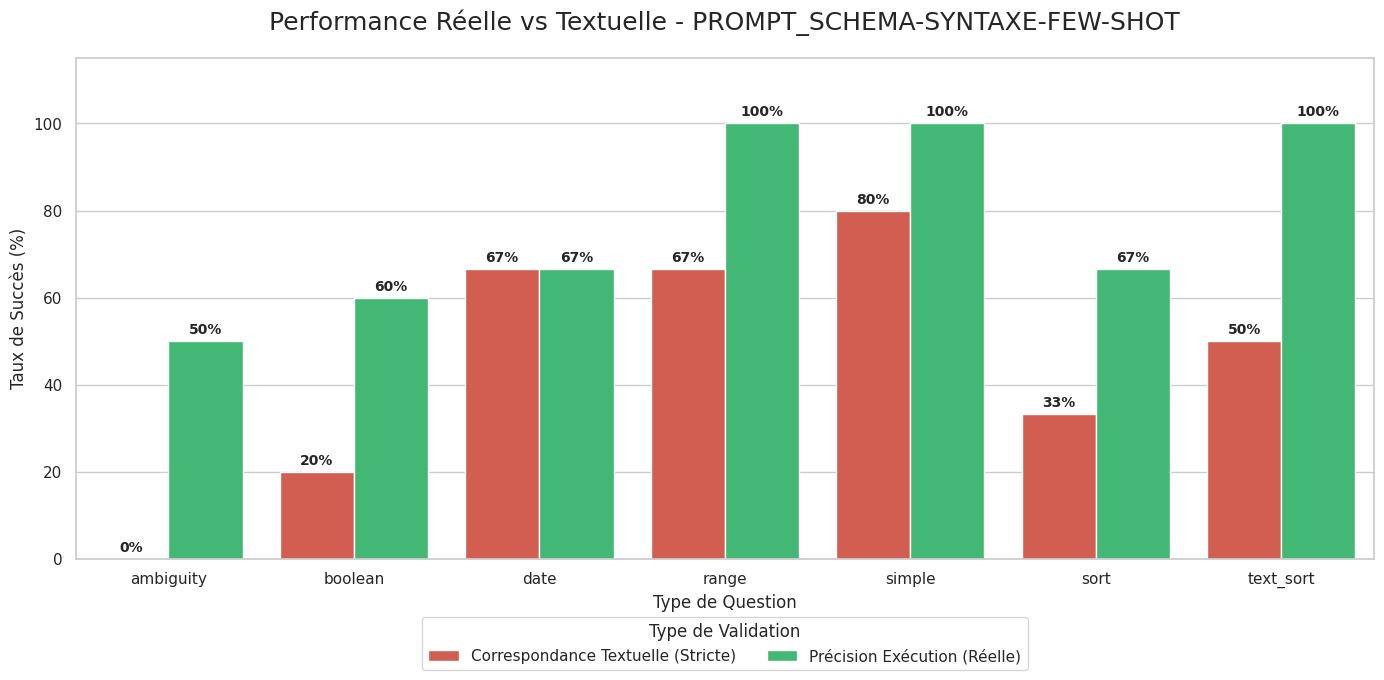


📈 GAIN DE PERFORMANCE GRÂCE À L'EXÉCUTION : +32.00 points
Score Final Réel : 76.00%


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# --- 1. CHARGEMENT DU FICHIER ---
# On cherche les fichiers qui commencent par results_exec (les plus complets)
# Si tu n'as pas encore lancé le script d'exécution, change par 'results_*.json'
list_of_files = glob.glob('results_exec_*.json')

# Fallback si on ne trouve que des résultats simples
if not list_of_files:
    list_of_files = glob.glob('results_*.json')

if not list_of_files:
    print("❌ Aucun fichier de résultats trouvé.")
else:
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"📂 Visualisation du fichier : {latest_file}")
    
    df = pd.read_json(latest_file)
    
    # Récupération du nom du modèle (ou valeur par défaut)
    model_name = name_prompt
    
    # --- 2. PRÉPARATION DES DONNÉES (PIVOT) ---
    # On vérifie si on a bien les données d'exécution
    has_execution = 'execution_match' in df.columns
    
    if has_execution:
        # On calcule les moyennes pour les DEUX métriques
        cols_to_keep = ['is_exact_match', 'execution_match']
        df_grouped = df.groupby('difficulty')[cols_to_keep].mean() * 100
        df_grouped = df_grouped.reset_index()
        
        # Transformation "Wide to Long" pour Seaborn (Melt)
        df_plot = df_grouped.melt(
            id_vars='difficulty', 
            var_name='Metric', 
            value_name='Score'
        )
        
        # Renommage pour la légende
        df_plot['Metric'] = df_plot['Metric'].map({
            'is_exact_match': 'Correspondance Textuelle (Stricte)',
            'execution_match': 'Précision Exécution (Réelle)'
        })
    else:
        # Fallback : Ancien mode (une seule barre)
        print("⚠️ Attention : Pas de données d'exécution dans ce fichier.")
        df_grouped = df.groupby('difficulty')['is_exact_match'].mean() * 100
        df_grouped = df_grouped.reset_index()
        df_plot = df_grouped.melt(id_vars='difficulty', var_name='Metric', value_name='Score')
        df_plot['Metric'] = 'Correspondance Textuelle'

    # --- 3. CRÉATION DU GRAPHIQUE ---
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 7)) 
    
    # Dessin avec 'hue' pour faire les barres groupées
    ax = sns.barplot(
        x='difficulty', 
        y='Score', 
        hue='Metric', # C'est ça qui crée les doubles barres
        data=df_plot, 
        palette=["#e74c3c", "#2ecc71"] # Rouge pour Texte, Vert pour Exécution (visuel efficace)
    )
    
    # Titres et Labels
    plt.title(f"Performance Réelle vs Textuelle - {model_name}", fontsize=18, pad=20)
    plt.ylabel("Taux de Succès (%)", fontsize=12)
    plt.xlabel("Type de Question", fontsize=12)
    plt.ylim(0, 115)
    plt.legend(title="Type de Validation", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    # Ajout des étiquettes de valeur sur CHAQUE barre
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', padding=3, fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # --- 4. PETIT RÉSUMÉ CHIFFRÉ ---
    if has_execution:
        acc_text = df['is_exact_match'].mean() * 100
        acc_exec = df['execution_match'].mean() * 100
        gain = acc_exec - acc_text
        print(f"\n📈 GAIN DE PERFORMANCE GRÂCE À L'EXÉCUTION : +{gain:.2f} points")
        print(f"Score Final Réel : {acc_exec:.2f}%")

📂 8 fichiers trouvés. Compilation des scores...
  👉 system_PROMPT_SCHEMA-SYNTAXE   : Heatmap basée sur TEXTE (Pas de Solr)
  👉 system_PROMPT_SCHEMA           : Heatmap basée sur TEXTE (Pas de Solr)
  👉 system_PROMPT_BAD              : Heatmap basée sur TEXTE (Pas de Solr)
  👉 Exec_system_PROMPT_SCHEMA      : Heatmap basée sur EXÉCUTION
  👉 Exec_system_PROMPT_SCHEMA-SYNTAXE : Heatmap basée sur EXÉCUTION
  👉 Exec_system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT : Heatmap basée sur EXÉCUTION
  👉 system_PROMPT_SCHEMA-SYNTAXE-FEW-SHOT : Heatmap basée sur TEXTE (Pas de Solr)
  👉 Exec_system_PROMPT_BAD         : Heatmap basée sur EXÉCUTION


/home/hsuire/BENCHMARK_PROMPT_CAS1/venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipykernel_826/166709405.py:114: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/hsuire/BENCHMARK_PROMPT_CAS1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hsuire/BENCHMARK_PROMPT_CAS1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


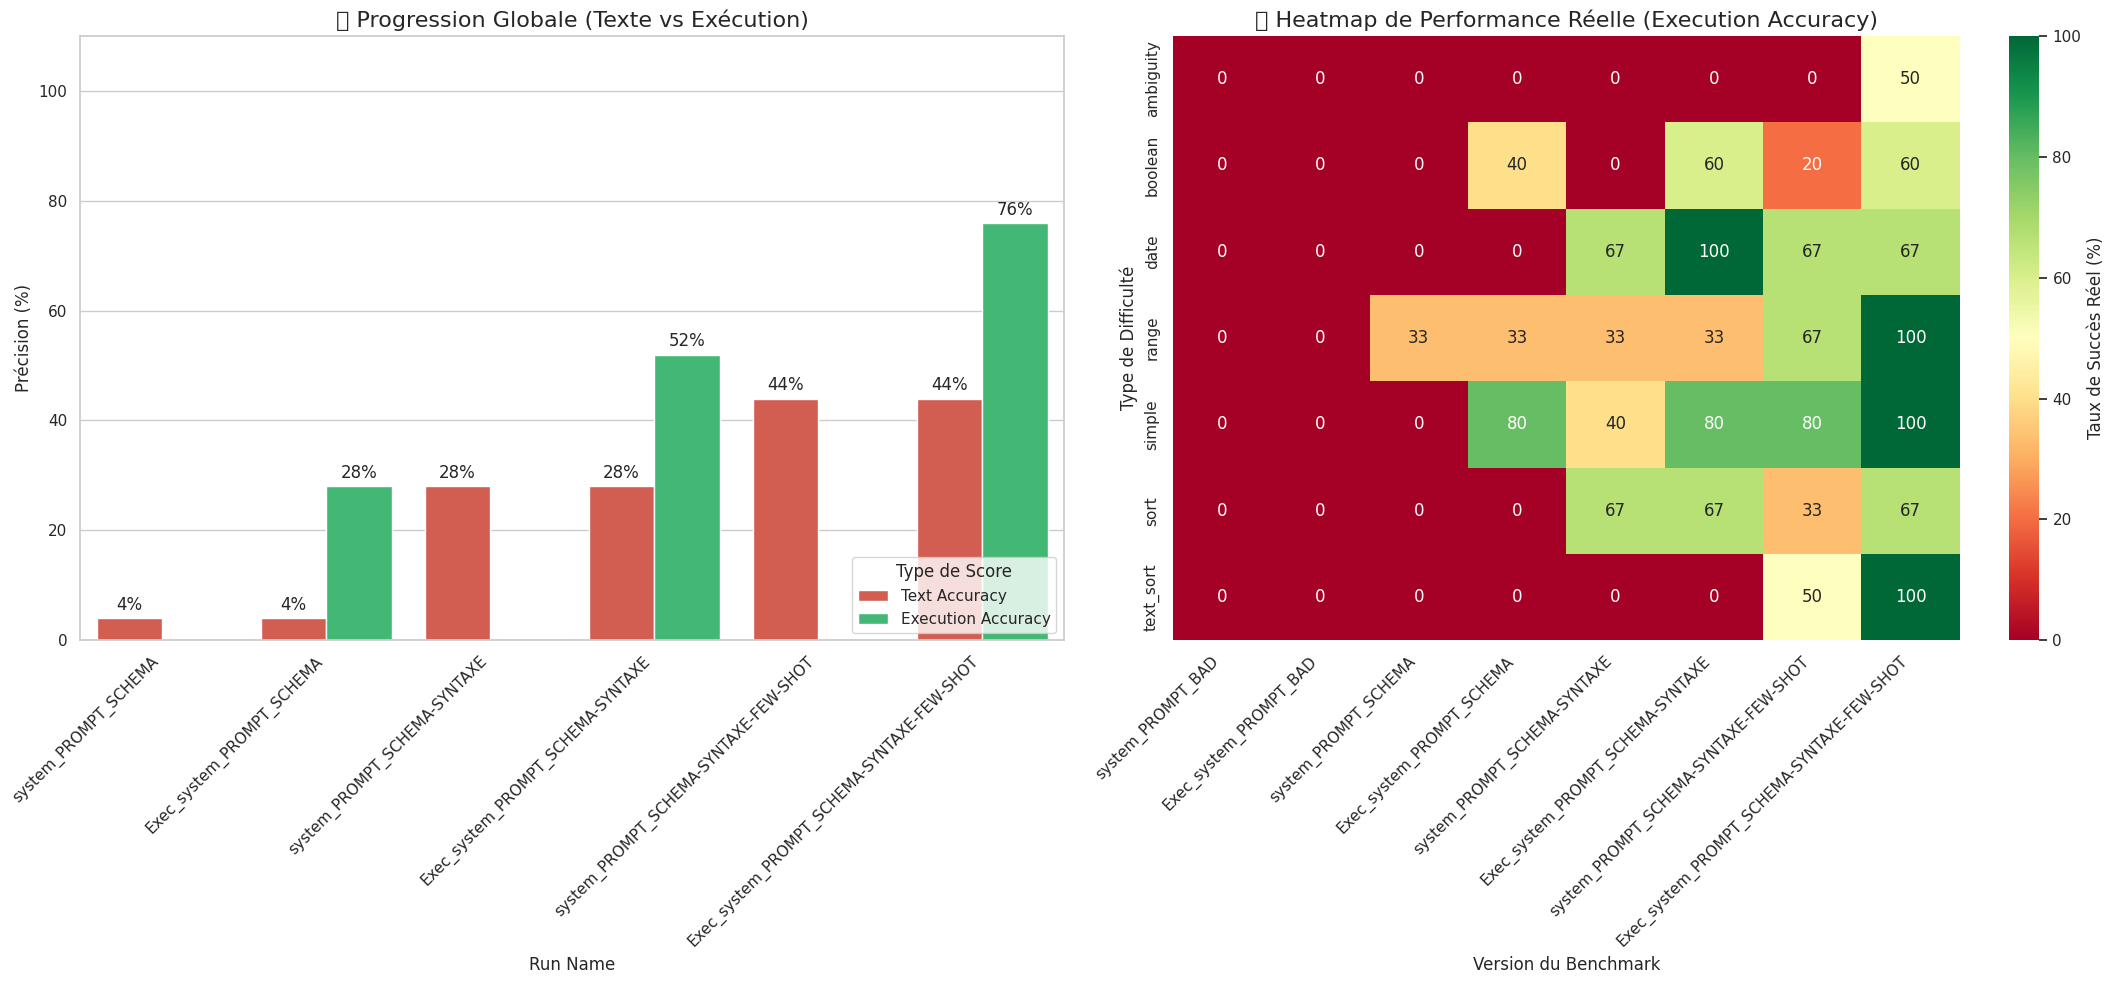

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import json
import re

# --- 1. FILTRAGE STRICT : UNIQUEMENT LES FICHIERS "EXEC" ---
files = glob.glob('results_exec_*.json')

if not files:
    print("❌ Aucun fichier 'results_exec_*.json' trouvé. Lance d'abord le script de validation Solr !")
else:
    print(f"📂 {len(files)} fichiers de benchmark validés trouvés.")

    summary_data = []
    detailed_data = []

    for filename in files:
        try:
            with open(filename, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            df_temp = pd.DataFrame(data)
            
            # --- 2. EXTRACTION DU NOM DU PROMPT (Depuis le titre du fichier) ---
            # Ex: "results_exec_mon_super_prompt_2024-10-10.json" -> "mon_super_prompt"
            base_name = os.path.basename(filename)
            
            # On retire le préfixe fixe
            clean_name = base_name.replace("results_exec_", "")
            
            # On retire la date (tout ce qui commence par _202x...)
            # Regex: cherche un underscore suivi de 202 et d'un chiffre
            clean_name = re.split(r'_202\d', clean_name)[0]
            
            # Si le nom est vide (cas rare), on garde le fichier brut
            run_name = clean_name if clean_name else base_name

            # --- 3. CALCUL DES SCORES ---
            # On récupère les deux métriques pour voir le "Gain"
            score_text = df_temp['is_exact_match'].mean() * 100
            score_exec = df_temp['execution_match'].mean() * 100
            
            summary_data.append({
                'Prompt Name': run_name,
                'Text Match': score_text,
                'Execution Match (Real)': score_exec,
                'File Date': os.path.getctime(filename)
            })
            
            # Pour la Heatmap, on regarde uniquement le score RÉEL (Exécution)
            diff_scores = df_temp.groupby('difficulty')['execution_match'].mean() * 100
            for diff, score in diff_scores.items():
                detailed_data.append({
                    'Prompt Name': run_name,
                    'Difficulty': diff,
                    'Score': score
                })
                
        except Exception as e:
            print(f"⚠️ Erreur lecture {filename}: {e}")

    # --- 4. VISUALISATION ---
    if summary_data:
        # Tri par date
        df_summary = pd.DataFrame(summary_data).sort_values('File Date')
        df_detail = pd.DataFrame(detailed_data)
        
        sns.set_theme(style="whitegrid")
        fig = plt.figure(figsize=(22, 10))
        
        # --- GRAPHIQUE 1 : LEADERBOARD (Comparaison Text vs Exec) ---
        ax1 = plt.subplot(1, 2, 1)
        
        # Transformation pour avoir les deux barres
        df_melted = df_summary.melt(id_vars='Prompt Name', value_vars=['Text Match', 'Execution Match (Real)'], var_name='Metric', value_name='Score')
        
        # Palette : Gris pour le texte (théorique), Vert pour l'exécution (réel)
        sns.barplot(x='Prompt Name', y='Score', hue='Metric', data=df_melted, palette=["#95a5a6", "#2ecc71"], ax=ax1)
        
        ax1.set_title("🏆 Comparaison des Prompts : Théorie vs Réalité", fontsize=16)
        ax1.set_ylim(0, 110)
        ax1.set_ylabel("Précision (%)")
        ax1.set_xlabel("Nom du Prompt")
        plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
        ax1.legend(loc='lower right')
        
        # Labels
        for container in ax1.containers:
            ax1.bar_label(container, fmt='%.0f%%', padding=3)

        # --- GRAPHIQUE 2 : HEATMAP (Basée uniquement sur l'Exécution) ---
        ax2 = plt.subplot(1, 2, 2)
        
        heatmap_data = df_detail.pivot(index='Difficulty', columns='Prompt Name', values='Score')
        # Ordre chronologique
        heatmap_data = heatmap_data[df_summary['Prompt Name'].tolist()]
        
        sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdYlGn", vmin=0, vmax=100, 
                    cbar_kws={'label': 'Taux de Succès Réel (%)'}, ax=ax2)
        
        ax2.set_title("🔥 Détail par Difficulté (Basé sur l'Exécution)", fontsize=16)
        ax2.set_xlabel("Nom du Prompt")
        ax2.set_ylabel("Difficulté")
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()
    else:
        print("Aucune donnée valide à afficher.")